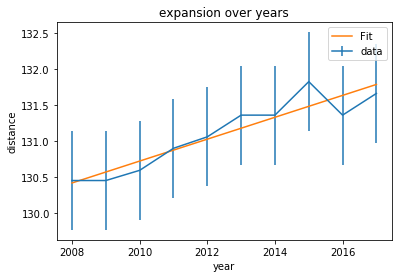

1149.00972584
311.551394302


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

p = 1845   # Pixel of Fixstern 
d = 632     # real distance in parsec
pixel1 = np.array([381.2466, 381.2466, 381.2466, 381.7250, 382.6029, 383.4814, 383.4814, 384.8376, 383.4814, 384.3605])    # center of crab to the edge
error_pixel1 = np.full(len(pixel1), 2)
distance = np.array([pixel1[i] / p* d for i in range(0, len(pixel1))])
error_distance = error_pixel1 / p * d
distance[0] = pixel1[0] * d / 1847
distance[1] = pixel1[1] * d / 1847
distance[3] = pixel1[3] * d / 1843
year = np.linspace(2008, 2017, 10)
def line(x, c ,b):
    return c*x + b
popt, pcov = curve_fit(line, year, distance)
plt.errorbar(year, distance, yerr = error_distance, label = 'data')
plt.plot(year, line(year, popt[0], popt[1]), label = 'Fit')
plt.xlabel('year')
plt.ylabel('distance')
plt.legend(loc = 'best')
plt.title('expansion over years')
plt.show()
print(-popt[1]/popt[0])
error = -popt[1]/popt[0] * np.sqrt(pcov[0][0]/popt[0]**2 + pcov[1][1]/popt[1]**2)
print(-popt[1]/popt[0] * np.sqrt(pcov[0][0]/popt[0]**2 + pcov[1][1]/popt[1]**2))

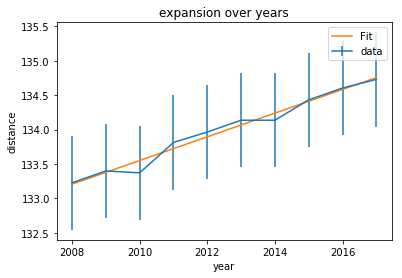

1234.25133553
133.936870246


In [89]:
pixel2 = np.array([389.3507, 389.8525, 389.3507, 390.2166, 391.0831, 391.5827, 391.5827, 392.4487, 392.9491, 393.3154])    # center of crab to the edge
distance2 = np.array([pixel2[i] / p* d for i in range(0, len(pixel2))])
error_distance2 = error_pixel1 / p * d
distance2[0] = pixel2[0] * d / 1847
distance2[1] = pixel2[1] * d / 1847
distance2[3] = pixel2[3] * d / 1843
popt2, pcov2 = curve_fit(line, year, distance2)
plt.errorbar(year, distance2, yerr = error_distance2, label = 'data')
plt.plot(year, line(year, popt2[0], popt2[1]), label = 'Fit')
plt.xlabel('year')
plt.ylabel('distance')
plt.legend(loc = 'best')
plt.title('expansion over years')
plt.show()
print(-popt2[1]/popt2[0])
error2 =-popt2[1]/popt2[0] * np.sqrt(pcov2[0][0]/popt2[0]**2 + pcov2[1][1]/popt2[1]**2)
print(error2)

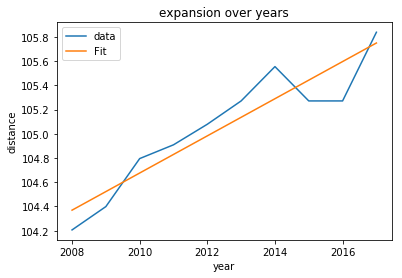

1327.2950062
336.878313183


In [90]:
pixel3 = np.array([304.5406, 305.1033, 305.9297, 305.9297, 306.7572, 307.3191, 308.1461, 307.3191, 307.3191, 308.9741])    # center of crab to the edge
distance3 = np.array([pixel3[i] / p* d for i in range(0, len(pixel3))])
distance3[0] = pixel3[0] * d / 1847
distance3[1] = pixel3[1] * d / 1847 
distance3[3] = pixel3[3] * d / 1843 
popt3, pcov3 = curve_fit(line, year, distance3)
plt.plot(year, distance3, label = 'data')
plt.plot(year, line(year, popt3[0], popt3[1]), label = 'Fit')
plt.xlabel('year')
plt.ylabel('distance')
plt.legend(loc = 'best')
plt.title('expansion over years')
plt.show()
print(-popt3[1]/popt3[0])
error3 = -popt3[1]/popt3[0] * np.sqrt(pcov3[0][0]/popt3[0]**2 + pcov3[1][1]/popt3[1]**2)
print(error3)

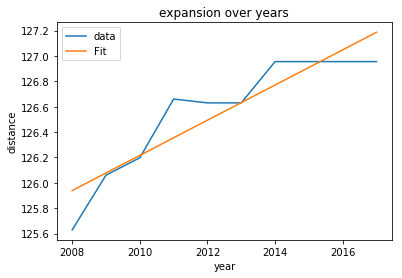

1099.45592267
356.708298382


In [91]:
pixel4 = np.array([367.1471, 368.4087, 368.4087, 369.3589, 369.6715, 369.6715, 370.6211, 370.6211, 370.6211, 370.6211])    # center of crab to the edge
distance4 = np.array([pixel4[i] / p* d for i in range(0, len(pixel4))])
distance4[0] = pixel4[0] * d / 1847
distance4[1] = pixel4[1] * d / 1847
distance4[3] = pixel4[3] * d / 1843
popt4, pcov4 = curve_fit(line, year, distance4)
plt.plot(year, distance4, label = 'data')
plt.plot(year, line(year, popt4[0], popt4[1]), label = 'Fit')
plt.xlabel('year')
plt.ylabel('distance')
plt.legend(loc = 'best')
plt.title('expansion over years')
plt.show()
print(-popt4[1]/popt4[0])
error4 = -popt4[1]/popt4[0] * np.sqrt(pcov4[0][0]/popt4[0]**2 + pcov4[1][1]/popt4[1]**2)
print(error4)

In [95]:
print(np.mean(np.array([-popt[1]/popt[0], -popt2[1]/popt2[0], -popt3[1]/popt3[0], -popt4[1]/popt4[0]])))
staterr = np.std(np.array([-popt[1]/popt[0], -popt2[1]/popt2[0], -popt3[1]/popt3[0], -popt4[1]/popt4[0]]))
print(np.sqrt((error**2+error2**2+error3**2+error4**2))/2)

1202.50299756
298.216014212


In [144]:
from astropy import units as u
from astropy import constants as const
v_lin = 29/3727/2 * const.c
v_ang = np.mean(np.array([popt[0], popt2[0], popt3[0], popt4[0]]))
print(v_lin/(v_ang * (u.arcsec / u.year)))
(v_lin/(v_ang * (u.arcsec / u.year))).decompose()

print((0.6 / 2 * 80 + 3719 +3719 - 0.3 / 2 * 80)/2)

7574586.753758755 m yr / (arcsec s)
3725.0


In [176]:
# 4. delay of Signal in different frequencies
def dispersion(dt, f1, f2):
    return dt/4150/(1/f1**2 - 1/f2**2)
# PSR 0329+54
d1 = dispersion(3.0/9.05, 234, 256)
d2 = dispersion(9.3/9.05, 256, 405)
d3 = dispersion(5.6/9.05, 405, 1420)
print("f1: 234 MHz, f2: 256 Mhz", d1)
print("f1: 256 MHz, f2: 405 Mhz", d2)
print("f1: 405 MHz, f2: 1420 Mhz", d3)
p1 = np.mean(np.array([d1, d2, d3]))
print(p1)
# PSR 0809+74
d4 = dispersion(11/160, 234, 256)
d5 = dispersion(0.2125, 256, 405)
d6 = dispersion(9/32, 234, 405)
print("f1: 234 MHz, f2: 256 Mhz", d4)
print("f1: 256 MHz, f2: 405 Mhz", d5)
print("f1: 234 MHz, f2: 405 Mhz", d6)
p2 = np.mean(np.array([d4, d5, d6]))
print(p2)
# PSR 0950+08
d7 = dispersion(1/24, 234, 256)
d8 = dispersion(15/128, 256, 405)
d9 = dispersion(1/6, 234, 405)
print("f1: 234 MHz, f2: 256 Mhz", d7)
print("f1: 256 MHz, f2: 405 Mhz", d8)
print("f1: 234 MHz, f2: 405 Mhz", d9)
p3 = np.mean(np.array([d7, d8, d9]))
print(p3)

f1: 234 MHz, f2: 256 Mhz 26.589946492681527
f1: 256 MHz, f2: 405 Mhz 27.0264200138377
f1: 405 MHz, f2: 1420 Mhz 26.62252081370052
26.7462957734
f1: 234 MHz, f2: 256 Mhz 5.51464411113843
f1: 256 MHz, f2: 405 Mhz 5.588729461194799
f1: 234 MHz, f2: 405 Mhz 5.570436490215868
5.55793668752
f1: 234 MHz, f2: 256 Mhz 3.342208552205109
f1: 256 MHz, f2: 405 Mhz 3.082019923453014
f1: 234 MHz, f2: 405 Mhz 3.3009994016094026
3.24174262576


In [178]:
# 5. electron density
d = 1597.8438 # pc
nd = 56 # cm-3 pc
n = nd / d
print('electron density along the line of sight: ', n)
n_pulsar = 0.03
print('distance of pulsar1: ', p1/n_pulsar)
print('distance of pulsar2: ', p2/n_pulsar)
print('distance of pulsar3: ', p3/n_pulsar)

electron density along the line of sight:  0.03504723052403495
distance of pulsar1:  891.543192447
distance of pulsar2:  185.264556251
distance of pulsar3:  108.058087525
